# Imports

In [1]:
import math
import inflection
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

## Helper Functions

## Loading Data

In [2]:
                            # lê todo o arquivo de uma vez 
df_sales_raw = pd.read_csv("data/train.csv", low_memory=False)
df_store_raw = pd.read_csv("data/store.csv", low_memory=False)

# merge
df_raw = pd.merge(  df_sales_raw, df_store_raw, how='left', on='Store' )

In [3]:
df_raw.sample(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
257411,552,2,2014-12-09,6257,645,1,0,0,0,a,a,4260.0,7.0,2008.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
627175,216,1,2013-12-16,15530,1522,1,1,0,0,c,a,190.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
1002043,444,1,2013-01-14,8081,1026,1,0,0,0,c,a,1700.0,11.0,2009.0,0,NaN,NaN,NaN
162110,436,7,2015-03-08,0,0,0,0,0,0,d,a,2300.0,NaN,NaN,0,NaN,NaN,NaN
11329,180,2,2015-07-21,5561,678,1,0,0,1,d,a,5800.0,9.0,2010.0,0,NaN,NaN,NaN
777307,938,7,2013-08-04,0,0,0,0,0,1,a,a,2820.0,9.0,2009.0,0,NaN,NaN,NaN
724544,580,5,2013-09-20,7748,1365,1,0,0,0,a,c,170.0,2.0,2009.0,0,NaN,NaN,NaN
644625,941,7,2013-12-01,0,0,0,0,0,0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
487311,842,1,2014-04-21,0,0,0,0,b,1,d,c,1200.0,11.0,2007.0,0,NaN,NaN,NaN
843703,434,3,2013-06-05,8401,598,1,1,0,0,a,a,13020.0,8.0,2003.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"


# Data Description

In [4]:
# Meigarom faz uma cópia a cada seção nova, pra em grandes códigos evitar sobrescrever a var
# do DS original e ter que rodar tudo de novo.
df1 = df_raw.copy()

## Rename Columns

In [5]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
#pega as colunas originais
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

In [7]:
#cria função pra transformar em snake_case
snakecase = lambda x: inflection.underscore ( x )

#aplica a função em todas as palabras de cols_old, guarda em lista na cols_new
cols_new = list( map( snakecase, cols_old ) )

#rename
df1.columns = cols_new

In [8]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## Data Dimension

In [9]:
print (f'Number of rows: {df1.shape[0] }')
print (f'Number of rows: {df1.shape[1] }')

Number of rows: 1017209
Number of rows: 18


## Data Types

In [10]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [11]:
#convert 'date' to datetime:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## Check NA

In [12]:
# Ver todas linhas que tem ao menos 1 NA
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### Há 3 formas de tratar:
1 - Excluir todas as linhas com NA.
     - Bom: rápido e fácil
     - Péssimo: descarta dados, pode prejudicar meu modelo
    
2 - Usar algoritmos de ML pra substituir NAs pela média, mediana, prevendo o número que seria 
através das colunas que tem valor.

3 - Descobrir porque o NA tá aqui. Pode ter trocado o sistema, antes não tinha essa coluna. Ou ainda antes era o valor de outra coluna.

## Fillout NA

Colunas com NA:
#competition_distance
#competition_open_since_month
#competition_open_since_year
#promo2_since_week
#promo2_since_year
#promo_interval

In [13]:
#competition_distance
#CompetitionDistance - distance in meters to the nearest competitor store

# Vou assumir que os que não tem valor aqui, não tem competidores perto.
# Logo, vou atribuir pras NAs um valor bem amior que o maior valor de distância existente.
df1['competition_distance'].max()

75860.0

In [14]:
#atribuindo o valor pra todas NA

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x ) 

In [15]:
#resolvido
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [16]:
#competition_open_since_month
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the
# nearest competitor was opened

# Se esta coluna está vazia, ou deve ser porque não tem competidor próximo, ou porque
# não sabem quando foi aberta. 
# Vou assumir nesse primeiro ciclo então minha data de venda como a data de abertura do 
# competidor, mesmo que seja simplista.

# precisa axis aqui pois são duas colunas que estamos mexendo no lambda
df1['competition_open_since_month'] = df1.apply ( lambda x: x['date'].month 
                    if math.isnan( x['competition_open_since_month'] ) 
                    else x['competition_open_since_month'], axis=1 ) 

In [17]:
#competition_open_since_year
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the
# nearest competitor was opened

# Vamos fazer pro year o mesno que o feito pro month:
df1['competition_open_since_year'] = df1.apply ( lambda x: x['date'].year 
                    if math.isnan( x['competition_open_since_year'] ) 
                    else x['competition_open_since_year'], axis=1 ) 

In [18]:
#promo2_since_week

# Promo2Since[Year/Week] - describes the year and calendar week when the store started 
#    participating in Promo2
#Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not
#    participating, 1 = store is participating

# promo2_since_week: Também vamos por hora setar a partir da data de venda
df1['promo2_since_week'] = df1.apply ( lambda x: x['date'].week 
                    if math.isnan( x['promo2_since_week'] ) 
                    else x['promo2_since_week'], axis=1 )

In [19]:
#promo2_since_year: Também vamos por hora setar a partir da data de venda
df1['promo2_since_year'] = df1.apply ( lambda x: x['date'].year 
                    if math.isnan( x['promo2_since_year'] ) 
                    else x['promo2_since_year'], axis=1 )

In [20]:
#promo_interval
# PromoInterval - describes the consecutive intervals Promo2 is started, naming the months 
# the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in 
# February, May, August, November of any given year for that store

#
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 
 9: 'Sept', 10: 'Out', 11: 'Nov', 12: 'Dec' }

#preencher NA com zeros
#inplace=True pra não retornar valor, mas motificar na coluna
df1['promo_interval'].fillna(0, inplace=True)

#cria coluna 'month_map' e seta o mes nela
df1['month_map'] = df1['date'].dt.month.map( month_map )

#cria coluna 'is_promo', e seta 1 se 'month_map' estiver em 'promo_interval', senão 0.
#assim, consigo saber se naquela venda, estava ou não em promoção.
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply ( lambda x: 
      0 if x['promo_interval'] == 0 else 
      1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis =1 )

In [21]:
 df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
38150,241,6,2015-06-27,6393,657,1,0,0,0,d,c,780.0,6.0,2015.0,0,26.0,2015.0,0,Jun,0
882398,104,3,2013-05-01,0,0,0,1,a,0,a,a,390.0,6.0,2009.0,0,18.0,2013.0,0,May,0
1004787,958,6,2013-01-12,2734,373,1,0,0,0,a,a,440.0,11.0,2013.0,0,2.0,2013.0,0,Jan,0
571474,265,2,2014-02-04,7762,671,1,1,0,0,a,a,4580.0,2.0,2014.0,1,14.0,2015.0,"Jan,Apr,Jul,Oct",Feb,0
664449,695,3,2013-11-13,4255,489,1,0,0,0,a,a,550.0,7.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct",Nov,0


In [22]:
 df1.sample(5).T

,504636,10263,719929,10774,662107
store,327,229,425,740,583
day_of_week,6,3,2,3,5
date,2014-04-05 00:00:00,2015-07-22 00:00:00,2013-09-24 00:00:00,2015-07-22 00:00:00,2013-11-15 00:00:00
sales,6462,7208,3732,6116,4304
customers,830,635,480,449,464
open,1,1,1,1,1
promo,0,0,1,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,c,d,d,d,a


## Change Types

In [23]:
# Como fizemos alteração nas colunas, é importante conferir se não mudou o formato das colnas
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [24]:
#converter de float pra int
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

## Descriptive Statistical

Serve para 2 coisas:
 - 1  Termos alguma noção de negócios pelos dados
 - 2  Conseguirmos detectar alguns erros (venda negativa por ex..)

Métricas de tendência central: média e mediana (resumem dados em um único número)
Metricas de dispersão: desvio padrão, min, max, range, skew, kurtosis

In [25]:
#separa colunas numéricas e categóricas, pra aplicar a estatística em cada conjunto:
num_attributes = df1.select_dtypes ( include=['int64','float64'] )
cat_attributes = df1.select_dtypes ( exclude=['int64','float64','datetime64[ns]'] )

In [26]:
num_attributes.sample(5)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
394632,292,2,6732,786,1,1,1,1100.0,6,2009,0,29,2014,0
242275,344,4,0,0,0,0,1,300.0,4,2011,1,14,2011,0
149784,375,4,9956,819,1,1,0,15710.0,2,2013,1,37,2009,0
589938,889,7,0,0,0,0,0,18670.0,12,2005,0,3,2014,0
540089,100,2,7448,614,1,1,1,17930.0,3,2014,0,10,2014,0


In [27]:
cat_attributes.sample(5)

,state_holiday,store_type,assortment,promo_interval,month_map
774582,0,d,a,0,Aug
386054,0,a,a,0,Jul
1003661,0,a,a,"Jan,Apr,Jul,Oct",Jan
1009958,0,c,c,0,Jan
80453,0,a,a,"Jan,Apr,Jul,Oct",May


### Numerical Attibures

In [28]:
#Métricas de tendência central: média e mediana
ct1 = pd.DataFrame ( num_attributes.apply ( np.mean ) ).T
ct2 = pd.DataFrame ( num_attributes.apply ( np.median ) ).T

#Metricas de dispersão: desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame ( num_attributes.apply ( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply ( min ) ).T
d3 = pd.DataFrame ( num_attributes.apply ( max ) ).T
d4 = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T

#concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index() 
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [29]:
#Análise geral:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [30]:
#Anlálise de SALES

#Vou retirar as vendas = 0 pra analisar o gráfico mais limpo:
df_sales_pos = df1.loc[ df1['sales'] > 0 ]

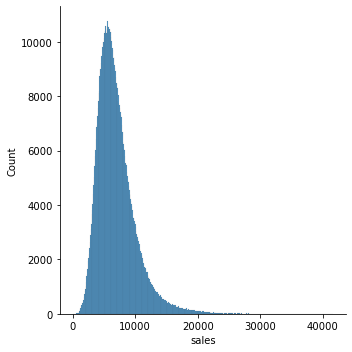

In [31]:
p = sns.displot ( df_sales_pos['sales'] )
#p.fig.set_dpi(100)
plt.show()

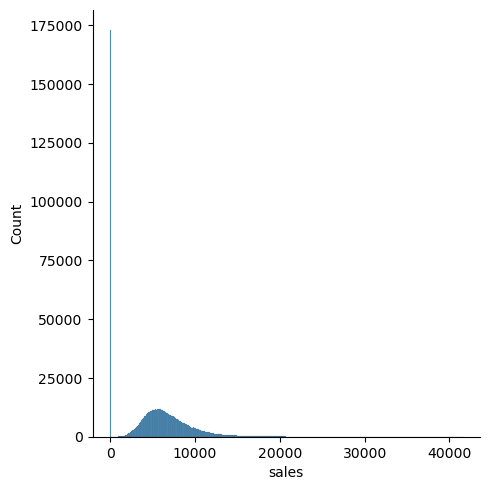

In [32]:
#Abaixo, ploto o gráfico do Sales original, porque o m que estou analistando 
# considera os zeros nas vendas também!
p = sns.displot ( df1['sales'] )
p.fig.set_dpi(100)
plt.show()

ANÁLISE SALES:

- Média e mediana bem próximas, não vai ter deslocamento da distribuição muito grande, vide skew.
- Skew 0.6 positivo (deslocamento leve para esquerda), mas bem próximo a zero, logo distribuição bem próxima de uma normal. 
- Kurtosis 1.77 positiva, próxima de 2, tem um pico grande.
- A média é de 5773 vendas/dia, e o std de 3850: Isto significa que em 78% dos dias (±1 std), temos entre 1923 (5773-3850) e 9.623 (5773+3850) vendas.

In [33]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


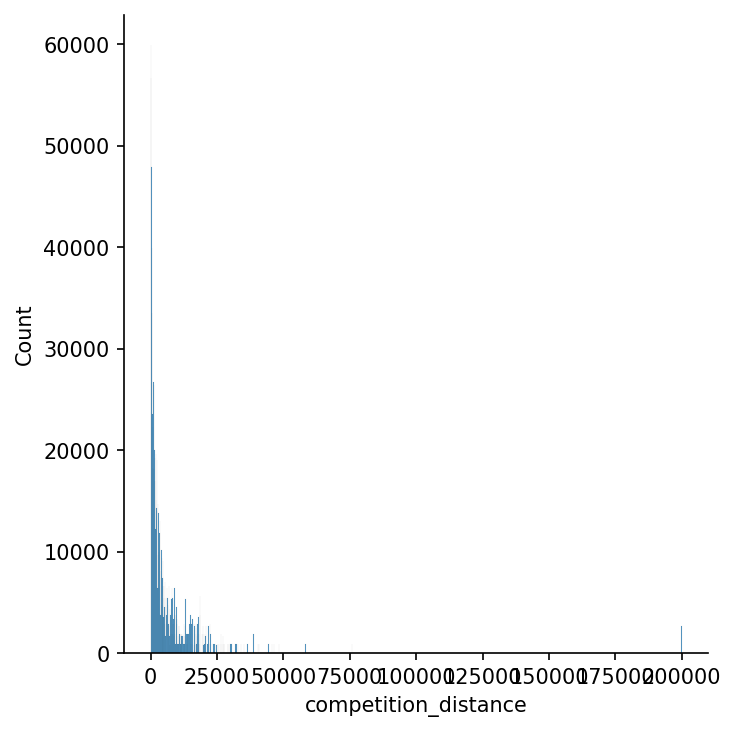

In [34]:
#Análise competition distance
p = sns.displot ( df1['competition_distance'] )
p.fig.set_dpi(150)
plt.show()

In [35]:
ANÁLISE COMPETITION DISTANDE:(apenas > 0):

- Média e mediana bem longe uma da outra, logo vai ter deslocamento da normal muito grande, 
vide skew.
- Skew 10.2 positiva (deslocamento enorme pra esquerda), indicando grande concentração de 
distâncias menores até os concorrentes.
- Kurtosis 147 positiva, indicando um pico gigantesco.

SyntaxError: invalid syntax (<ipython-input-35-642d74a923b1>, line 1)

In [ ]:
#Análise customers
#Vou retirar customers = 0 pra analisar o gráfico mais limpo:

df_cust_pos = df1.loc[ df1['customers'] > 0 ]

In [ ]:
p = sns.displot ( df_cust_pos['customers'] )
#p.fig.set_dpi(150)
plt.show()

In [ ]:
#Abaixo, ploto o gráfico do Customer original, porque o m que estou analistando 
# considera os zeros nos customers também!
p = sns.displot ( df1['customers'] )
p.fig.set_dpi(100)
plt.show()

ANÁLISE CUSTOMERS:

- Média (633) e mediana (609) próximas, mas mediana menor: deslocamento da curva levemente pra esquerda.

- Logo, skew levemente positiva, indicando maior concentração dos valores mais abaixo da média (ponto central).

- Kursosis de 7, logo pico muito alto /distribuição bem dispersa em número de clientes por dia.

- Std de 464, e média de clientes por dia de 633: em 78% dos dias (34% ref. 1 std positivo + 34% ref. 1 std negativo), tivemos entre 169 (633-464) e 1097 (633+464) clientes. 



In [ ]:
m

### Categorical Attibures

In [41]:
cat_attributes.apply ( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [ ]:
df1['state_holiday'].value_counts()

<AxesSubplot:xlabel='assortment', ylabel='sales'>

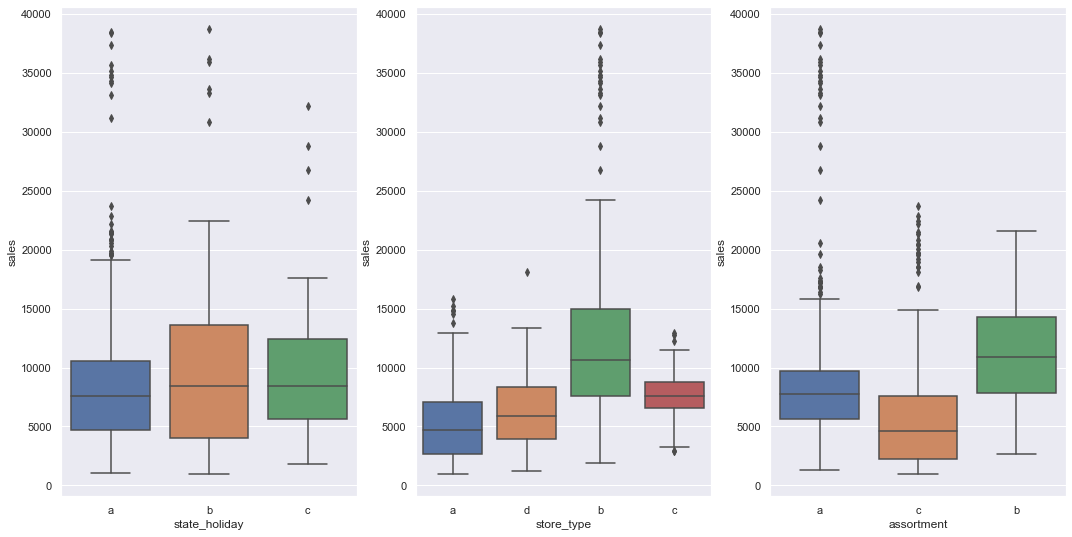

In [88]:
#Boxplot tem todas as medidas de dispersão e tendência central. Vamos usar ele.

#vendas nos feriados: remover dias não feriado e dias onde não teve vendas 
aux1 = df1[ (df1['state_holiday'] != '0') & (df1['sales'] > 0) ]

#setar tamanho:
sns.set(rc={'figure.figsize':(18,9)})

plt.subplot (1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot (1, 3, 2)
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot (1, 3, 3)
sns.boxplot( x='assortment', y='sales', data=aux1 )

Acima, a linha meio de cada imagem colorida é o 50º quartil, ou seja a mediana.
A borda da figura de baixo é o quartil 25, a de cima o 75.
Logo, dentro da imagem laranja, tenho o volume do quartil 25 ao 50, e do 50 ao 75. 
Fora da figura até os riscos superior e inferior é o valor mínimo e máximo.
Pontos após os riscos das bordas (valores máximos) são outliers: > 3 vezes o desvio padrão.

Logo, quanto mais achatada é a figura, maior a concentração em torno da mediana.

Análise do boxplot 1 - quantidade de vendas por tipo de feriado:
Legenda state_holiday: a = public holiday | b = Easter holiday |  c = Christmas

-A mediana de vendas de páscoa(b) e natal (c) é mais alta que de feriados publicos (a).
-A mediana de vendas de páscoa(b) e natal (c) é parecida, mas a dispersão é maior na páscoa.

Análise do boxplot 2 - quantidade de vendas por tipo de loja:
    Legenda de StoreType - differentiates between 4 different store models: a, b, c, d
        
-Loja tipo b vende muito mais na mediana que as demais, aprox. o dobro da tipo a.
-Loja do tipo c tem concentração de vendas maior em torno da mediana.


In [ ]:
Análise do boxplot 3 - quantidade de vendas por mix de produtos:
    Legenda de Assortment - describes an assortment level: a = basic, b = extra, c = extended
        
-Há muito mais vendas do mix b do que dos demais. E o número de vendas varia mais também
neste mix.
-O mix A tem uma grande quantidade de outliers, mas uma distribuição bem uniforme fora isto.

<AxesSubplot:xlabel='assortment', ylabel='sales'>

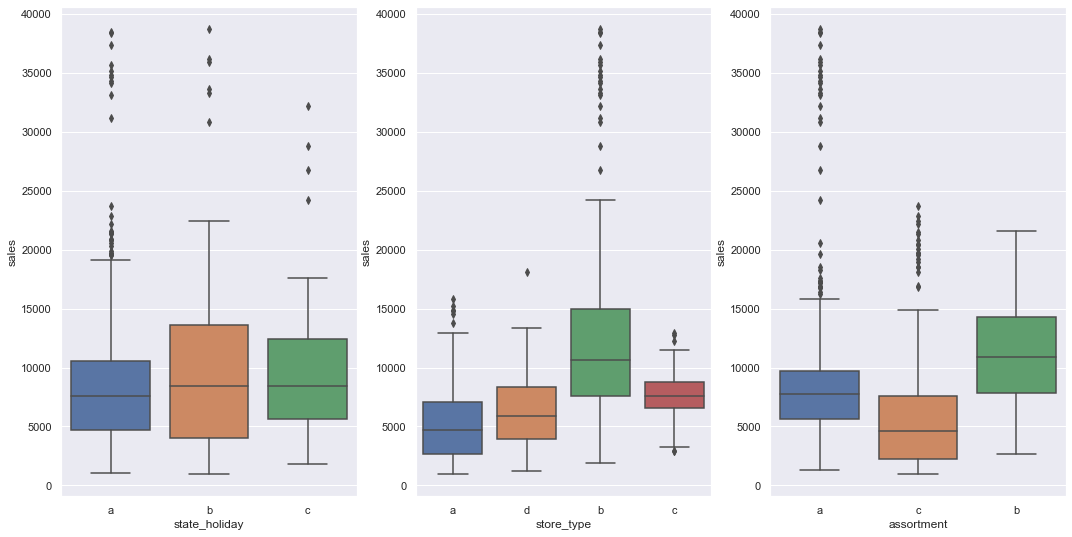

In [89]:
#Boxplot tem todas as medidas de dispersão e tendência central. Vamos usar ele.

#vendas nos feriados: remover dias não feriado e dias onde não teve vendas 
aux1 = df1[ (df1['state_holiday'] != '0') & (df1['sales'] > 0) ]

#setar tamanho:
sns.set(rc={'figure.figsize':(18,9)})

plt.subplot (1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot (1, 3, 2)
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot (1, 3, 3)
sns.boxplot( x='assortment', y='sales', data=aux1 )